To evaluate search relevancy, CrowdFlower has had their crowd evaluate searches from a handful of eCommerce websites. 
A total of 261 search terms were generated, and CrowdFlower put together a list of products and their corresponding search terms. 
Each rater in the crowd was asked to give a product search term a score of 1, 2, 3, 4, with 4 indicating the item completely 
satisfies the search query, and 1 indicating the item doesn't match the search term.

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
from nltk.corpus import stopwords

In [3]:
train = pd.read_csv('train.csv').fillna(0)

In [4]:
train.shape

(10158, 6)

In [5]:
test = pd.read_csv('test.csv').fillna(0)

In [6]:
test.shape

(22513, 4)

In [7]:
train.head()

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,0,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [8]:
train.shape, test.shape

((10158, 6), (22513, 4))

In [9]:
train.dtypes, test.dtypes

(id                       int64
 query                   object
 product_title           object
 product_description     object
 median_relevance         int64
 relevance_variance     float64
 dtype: object, id                      int64
 query                  object
 product_title          object
 product_description    object
 dtype: object)

In [10]:
#look at queries in training df
len(train['query'].unique())
#261 unique searches out of 10158 total observations

261

In [11]:
#look at queries in test df
len(test['query'].unique())
#same number innnnnteresting..uh duh it says that up top

261

In [12]:
unique1 = train['query'].unique()
unique2 = test['query'].unique()

In [13]:
match = unique1 == unique2

In [14]:
len(match)

261

In [15]:
print(len(train['product_title'].unique()))
print(len(test['product_title'].unique()))

9708
21110


In [16]:
#the product titles are not the same
#also from the train.shape and test.shape we see the length of unique values almost equals the number of observations
#this means each product title appears only once (more or less)

In [17]:
#do some basic text analysis

In [18]:
stop = stopwords.words('english')
len(stop)
#stop word removal not working IMO

153

In [19]:
train['product_description'] = train['product_description'].astype(str)
test['product_description'] = test['product_description'].astype(str)

In [20]:
train['product_title'] = train['product_title'].astype(str)
test['product_title'] = test['product_title'].astype(str)

In [21]:
train['query_cleaned'] = train['query'].map(lambda x: [item for item in x.split() if item not in stop])
train['product_description_cleaned'] = train['product_description'].map(lambda x: [item for item in x.split() if item not in stop])

In [22]:
test['query_cleaned'] = test['query'].map(lambda x: [item for item in x.split() if item not in stop])
test['product_description_cleaned'] = test['product_description'].map(lambda x: [item for item in x.split() if item not in stop])

In [23]:
train['product_title_cleaned'] = train['product_title'].map(lambda x: [item for item in x.split() if item not in stop])
test['product_title_cleaned'] = test['product_title'].map(lambda x: [item for item in x.split() if item not in stop])

In [24]:
train.head(3)

,id,query,product_title,product_description,median_relevance,relevance_variance,query_cleaned,product_description_cleaned,product_title_cleaned
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000,"[bridal, shower, decorations]","[Red, satin, accent, pillow, embroidered, hear...","[Accent, Pillow, Heart, Design, -, Red/Black]"
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,"[led, christmas, lights]","[Set, 10, Battery, Operated, Train, Christmas,...","[Set, 10, Battery, Operated, Multi, LED, Train..."
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,0,4,0.471,[projector],[0],"[ViewSonic, Pro8200, DLP, Multimedia, Projector]"


In [25]:
train['len_product_title'] = train['product_title_cleaned'].apply(len)
train['len_product_description'] = train['product_description_cleaned'].apply(len)
train['len_query'] = train['query_cleaned'].apply(len)

In [26]:
test['len_product_title'] = test['product_title_cleaned'].apply(len)
test['len_product_description'] = test['product_description_cleaned'].apply(len)
test['len_query'] = test['query_cleaned'].apply(len)

In [27]:
train.head(3)

,id,query,product_title,product_description,median_relevance,relevance_variance,query_cleaned,product_description_cleaned,product_title_cleaned,len_product_title,len_product_description,len_query
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000,"[bridal, shower, decorations]","[Red, satin, accent, pillow, embroidered, hear...","[Accent, Pillow, Heart, Design, -, Red/Black]",6,11,3
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,"[led, christmas, lights]","[Set, 10, Battery, Operated, Train, Christmas,...","[Set, 10, Battery, Operated, Multi, LED, Train...",12,119,3
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,0,4,0.471,[projector],[0],"[ViewSonic, Pro8200, DLP, Multimedia, Projector]",5,1,1


In [28]:
def str_common_word(str1, str2):
    words, cnt = str1.split(), 0
    for word in words:
        if str2.find(word)>=0:
            cnt+=1
    return cnt

In [29]:
def str_whole_word(str1, str2, i_):
    cnt = 0
    while i_ < len(str2):
        i_ = str2.find(str1, i_)
        if i_ == -1:
            return cnt
        else:
            cnt += 1
            i_ += len(str1)
    return cnt

In [30]:
#length of query
train['query_cleaned'] = train['query_cleaned'].astype(str)
test['query_cleaned'] = test['query_cleaned'].astype(str)
train['len_of_query'] = train['query_cleaned'].map(lambda x:len(x.split())).astype(np.int64)
test['len_of_query'] = test['query_cleaned'].map(lambda x:len(x.split())).astype(np.int64)

In [31]:
#length of description
#train['len_of_description'] = train['product_description_cleaned'].map(lambda x:len(x.split())).astype(np.int64)
#test['len_of_description'] = test['product_description_cleaned'].map(lambda x:len(x.split())).astype(np.int64)

In [32]:
#make new column for all product info
#train['product_info'] = train['query_cleaned']+"\t"+train['product_title_cleaned'] +"\t"+train['product_description_cleaned']
#test['product_info'] = test['query_cleaned']+"\t"+test['product_title_cleaned'] +"\t"+test['product_description_cleaned']

In [33]:
train.head(3)

,id,query,product_title,product_description,median_relevance,relevance_variance,query_cleaned,product_description_cleaned,product_title_cleaned,len_product_title,len_product_description,len_query,len_of_query
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000,"['bridal', 'shower', 'decorations']","[Red, satin, accent, pillow, embroidered, hear...","[Accent, Pillow, Heart, Design, -, Red/Black]",6,11,3,3
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,"['led', 'christmas', 'lights']","[Set, 10, Battery, Operated, Train, Christmas,...","[Set, 10, Battery, Operated, Multi, LED, Train...",12,119,3,3
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,0,4,0.471,['projector'],[0],"[ViewSonic, Pro8200, DLP, Multimedia, Projector]",5,1,1,1


In [34]:
import re

In [35]:
def count_words(x):
    return  len(re.findall(x['query'], x['product_title'].lower()))

In [36]:
train['query_in_title'] = train.apply(count_words, axis=1)

In [37]:
test['query_in_title'] = test.apply(count_words, axis=1)

In [38]:
def count_words_des(x):
    return  len(re.findall(x['query'], x['product_description'].lower()))

In [39]:
train['query_in_desc']= train.apply(count_words_des, axis=1)

In [40]:
test['query_in_desc']= test.apply(count_words_des, axis=1)

In [41]:
train.head()

,id,query,product_title,product_description,median_relevance,relevance_variance,query_cleaned,product_description_cleaned,product_title_cleaned,len_product_title,len_product_description,len_query,len_of_query,query_in_title,query_in_desc
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000,"['bridal', 'shower', 'decorations']","[Red, satin, accent, pillow, embroidered, hear...","[Accent, Pillow, Heart, Design, -, Red/Black]",6,11,3,3,0,0
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,"['led', 'christmas', 'lights']","[Set, 10, Battery, Operated, Train, Christmas,...","[Set, 10, Battery, Operated, Multi, LED, Train...",12,119,3,3,0,0
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,0,4,0.471,['projector'],[0],"[ViewSonic, Pro8200, DLP, Multimedia, Projector]",5,1,1,1,1,0
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000,"['wine', 'rack']","[Like, silent, sturdy, tree,, Southern, Enterp...","[Concept, Housewares, WR-44526, Solid-Wood, Ce...",11,85,2,2,1,0
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471,"['light', 'bulb']","[WTGR1011, Features, Nickel, base,, 60,000, av...","[Wintergreen, Lighting, Christmas, LED, Light,...",8,43,2,2,1,1


In [42]:
#train['ratio_title'] = train['query_in_title']/train['len_of_query']

In [43]:
#test['ratio_title'] = test['query_in_title']/train['len_of_query']

In [44]:
#train['ratio_description'] = train['query_in_desc']/train['len_of_query']

In [45]:
#test['ratio_description'] = test['query_in_desc']/train['len_of_query']

In [46]:
t = train
t = t[t.median_relevance == 4]
len(t)

6171

In [47]:
t = train
t = t[t.median_relevance == 3]
len(t)

1737

In [48]:
t = train
t = t[t.median_relevance == 2]
len(t)

1476

In [49]:
t = train
t = t[t.median_relevance == 1]
len(t)

774

In [50]:
import seaborn as sns
% matplotlib inline

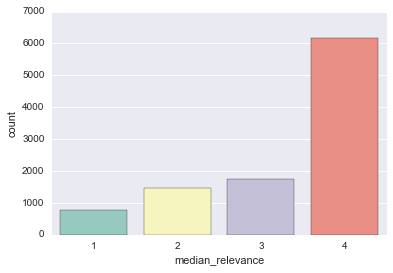

In [51]:
sns.countplot(train.median_relevance, palette = 'Set3')

In [52]:
# mport the random forest package # it's the best model used so far but i want to prove that
from sklearn.ensemble import RandomForestClassifier

In [53]:
list(train)

['id',
 'query',
 'product_title',
 'product_description',
 'median_relevance',
 'relevance_variance',
 'query_cleaned',
 'product_description_cleaned',
 'product_title_cleaned',
 'len_product_title',
 'len_product_description',
 'len_query',
 'len_of_query',
 'query_in_title',
 'query_in_desc']

In [54]:
feature_columns = [
 'len_product_title',
 'len_product_description',
 'len_query',
 'len_of_query',
 'query_in_title',
 'query_in_desc',
]

In [55]:
X = train[feature_columns]
y = train.median_relevance

In [56]:
X_test = test[feature_columns]

In [57]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
from sklearn.cross_validation import cross_val_score

In [59]:
cross_val_score(model, X, y, 'accuracy', cv=10)

array([ 0.52062868,  0.52310718,  0.52114061,  0.53294002,  0.5       ,
        0.51476378,  0.53596059,  0.50098619,  0.52366864,  0.50690335])

In [60]:
#look at feature importance
importances = model.feature_importances_
importances

array([ 0.20463404,  0.68485757,  0.01622232,  0.01839378,  0.03951248,
        0.03637981])

In [61]:
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.684858)
2. feature 0 (0.204634)
3. feature 4 (0.039512)
4. feature 5 (0.036380)
5. feature 3 (0.018394)
6. feature 2 (0.016222)


In [62]:
y_pred = model.predict(X_test)

In [63]:
#export it to csv
pd.DataFrame(test).to_csv("test_cleaned_may_30.csv")
pd.DataFrame(train).to_csv("train_cleaned_may_30.csv")

In [64]:
submission = pd.DataFrame({"id": test["id"], "prediction": y_pred})
submission.to_csv("submission4_may_30.csv", index=False)

In [65]:
#score 0.12235 (really bad)

In [66]:
import matplotlib.pyplot as plt

[[   1  326]
 [   2  586]
 [   3  681]
 [   4 2470]]
        queryCount   titleCount      Jaccard        label
count  4063.000000  4063.000000  4063.000000  4063.000000
mean      2.361309     7.707851     0.192668     3.303224
std       0.840798     2.866650     0.135936     0.990654
min       1.000000     1.000000     0.000000     1.000000
25%       2.000000     6.000000     0.100000     3.000000
50%       2.000000     7.000000     0.166667     4.000000
75%       3.000000     9.000000     0.250000     4.000000
max       6.000000    30.000000     1.000000     4.000000


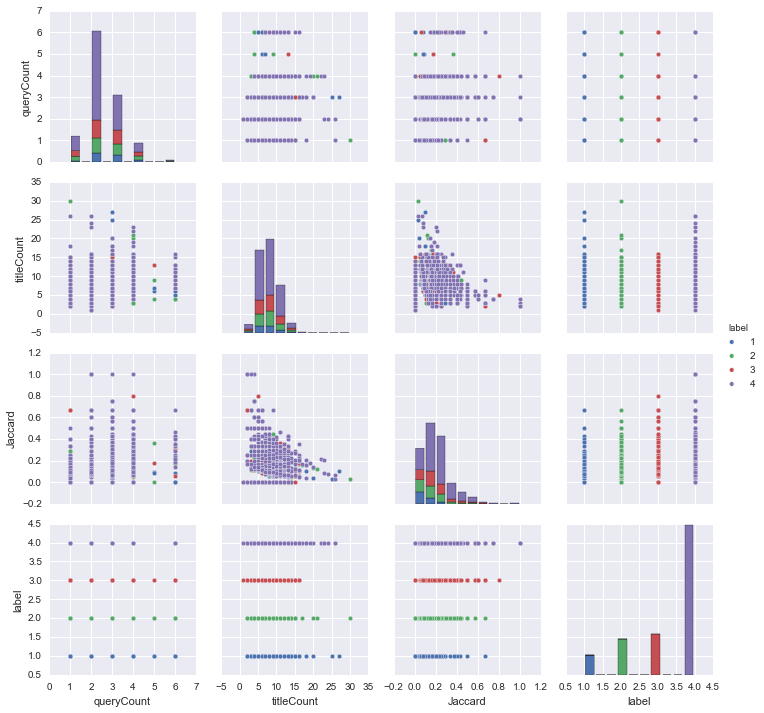

In [67]:
from scipy.stats import itemfreq
from nltk.stem.porter import PorterStemmer
import re

stemmer = PorterStemmer()
regex1 = re.compile('[^a-zA-Z]')

def stem(word):
    return stemmer.stem(word)

#Jaccard similarity coefficient score
#The Jaccard index [1], or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two sets.
def Jaccard(row):
    words0 = regex1.sub(' ', row[0])
    words1 = regex1.sub(' ', row[1])

    words0 = set(words0.lower().split(' '))
    words1 = set(words1.lower().split(' '))

    normalizer = max(float(len(words0 | words1)), 1.0)
    return len(words0 & words1) / normalizer

def length(string):
    words = regex1.sub(' ', string)
    words = [stem(word) for word in words.split(' ') if len(word) > 1]
    return len(set(words))

train = pd.read_csv('train.csv')
rows = train.shape[0]
train = train.loc[np.random.choice(train.index, round(0.4*rows), replace=False)]

# we dont need ID columns
train = train.drop('id', axis=1)
y = train.median_relevance.values
print(itemfreq(y))

train = train.drop(['median_relevance', 'relevance_variance'], axis=1)

train['queryCount'] = train['query'].apply(length)
train['titleCount'] = train['product_title'].apply(length)
train['Jaccard'] = train[['query', 'product_title']].apply(Jaccard, axis=1)
train['label'] = y
train = train.drop(['query', 'product_title', 'product_description'], axis=1)
print(train.describe())

fig = plt.figure()
pg = sns.pairplot(train, hue='label', size=2.5)
pg.savefig('pairplot.png')